# 1. Plot the data and argue if a linear model is a good choice given the data. 

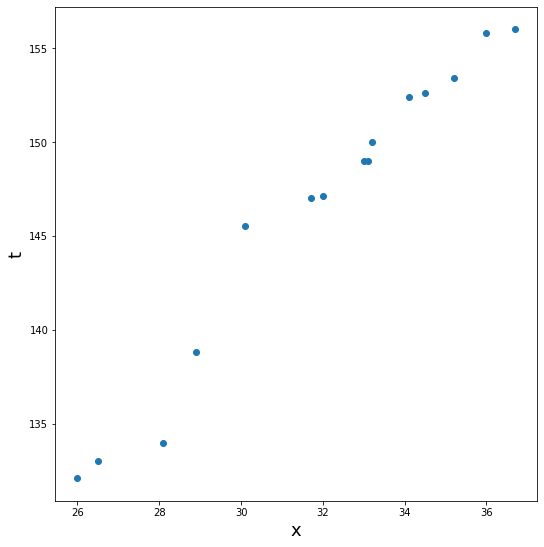

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N = 15
t = np.reshape(np.array([132.1,133.0,134.0,138.8,145.5,147.0,147.1,149.0,150.0,149.0,152.4,152.6, 153.4, 155.8, 156.0]), (N,1))
X = np.array([[1,26.0],[1,26.5],[1,28.1],[1,28.9],[1,30.1],[1,31.7],[1,32.0],[1,33.1],[1,33.2],[1,33.0],[1,34.1],[1,34.5],[1,35.2],[1,36.0],[1,36.7]], np.float)
fig=plt.figure(figsize=(19,20))
ax1=fig.add_subplot(2,2,1)
ax1.set_xlabel('x', fontsize=18)
ax1.set_ylabel('t', fontsize=18)
ax1.scatter(np.transpose(X)[1],t)




# 2. Obtain a probabilistic regression model based on a likelihood function to describe this dataset. Compute the model parameters.

Coefficients: w0: 70.07, w1: 2.39
Mean squared error: 1.97
Coefficient of determination: 0.97


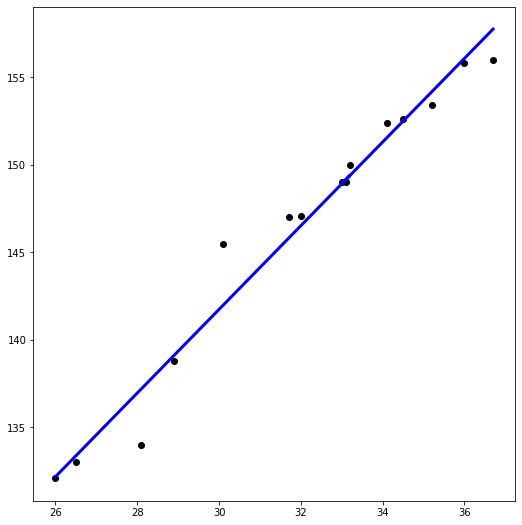

In [13]:
def LinearRegression(X,t,max_iter=1000): 
    N=15
    totXt=0
    totX2=0
    Xmean=np.mean(X,axis=0)[1]
    tmean=np.mean(t,axis=0)[0]
    t_pred=[]
    for n in range(N):
        xn=X[n][1]
        tn=t[n][0]
        totX2+=xn*xn
        totXt+=xn*tn
    x2mean=totX2/15    
    Xtmean=totXt/15
    w1=(Xtmean-Xmean*tmean)/(x2mean-Xmean*Xmean)
    w0=tmean-w1*Xmean
    for n in range(N):
        t_pred.append(w0+w1*X[n][1])
    return w0,w1,t_pred

def CoefficientDetermAndMeanSquaredLoss(X, t, w0, w1):
    resSquared=0
    totSquared=0
    tmean=np.mean(t,axis=0)[0]
    for n in range(15):
        resSquared+=(t[n][0]-(w0+w1*X[n][1]))**2
        totSquared+=(t[n][0]-tmean)**2   
    return 1-resSquared/totSquared, resSquared/15   
w0,w1,t_pred=LinearRegression(X,t)
Coeff, meansq=CoefficientDetermAndMeanSquaredLoss(X,t,w0,w1)
print('Coefficients: w0: %0.2f, w1: %0.2f' %(w0,w1)) 
print('Mean squared error: %.2f' %(meansq))
print('Coefficient of determination: %.2f' %(Coeff))
fig=plt.figure(figsize=(19,20))
ax2=fig.add_subplot(2,2,1)
ax2.scatter(np.transpose(X)[1], t,  color='black')
ax2.plot(np.transpose(X)[1], t_pred, color='blue', linewidth=3)

By calculating the mean squared error the variance of the distribution is obtained 1.97 as a parameter for the probabilistic regression model

# 3. Use the model to estimate the price of a studio of size 32.5. How certain are you about the estimation (i.e., what is the variance of the estimation)?

In [19]:
xnew=[[1],[32.5]]
w=[[w0],[w1]]
tnew=np.dot(np.transpose(xnew),w)
print('The price of a studio of size 32.5 is %0.2f ' %(tnew[0][0]))
b=np.linalg.inv(np.dot(np.transpose(X),X))
a=meansq*np.dot(np.transpose(xnew),b)
c=np.dot(a,xnew)
print('The variance of the estimation is %0.2f ' %(c[0][0]))

The price of a studio of size 32.5 is 147.72 
The variance of the estimation is 0.14 


# 4.Use the model to estimate the price of a studio of size 60, and the respective uncertainty (variance). What do you observe?

In [17]:
xnew=[[1],[60.0]]
w=[[w0],[w1]]
tnew=np.dot(np.transpose(xnew),w)
print('The price of a studio of size 60.0 is %0.2f ' %(tnew[0][0]))
b=np.linalg.inv(np.dot(np.transpose(X),X))
a=meansq*np.dot(np.transpose(xnew),b)
c=np.dot(a,xnew)
print('The variance of the estimation is %0.2f ' %(c[0][0]))

The price of a studio of size 60.0 is 213.42 


# 5.Use the model to estimate the price of a studio of size 10 and the respective uncertainty (variance). What do you observe?

In [21]:
xnew=[[1],[10.0]]
w=[[w0],[w1]]
tnew=np.dot(np.transpose(xnew),w)
print('The price of a studio of size 10.0 is %0.2f ' %(tnew[0][0]))
b=np.linalg.inv(np.dot(np.transpose(X),X))
a=meansq*np.dot(np.transpose(xnew),b)
c=np.dot(a,xnew)
print('The variance of the estimation is %0.2f ' %(c[0][0]))

The price of a studio of size 10.0 is 93.96 
The variance of the estimation is 6.16 
